# Predicción de Precios de Vuelos

---
### Descripción del Proyecto:

• En este Notebook, se analizará el dataset 'Flight_Fare' descargado en formato xlsx, conformado por más de 10 mil registros
y 11 variables (10 categóricas de tipo nominal y ordinal y la variable dependiente numérica tipo 'integer'). 
La variable dependiente u objetivo, corresponde a 'Price' la cual representa el precio de los vuelos en las aerolíneas de India de un año específico.

• Para la transformación de variables, se emplearon métodos como OneHotEnconder y LaberEncoder. Como parte del Análisis Exploratorio de Datos (EDA en Inglés), se emplearon gráficas de tipo 'catplot'. Para visualizar la correlación entre variables, fue utilizado el gráfico 'heatmap' de la librería 'seaborn'.

• Para la predicción, se empleó el modelo de machine learning 'Random Forest', considerado uno de los algoritmos de aprendizaje más certeros que hay disponible, además de que da estimaciones de qué variables son importantes en la clasificación.

### Agradecimiento

Me gustaría agradecer a Sir Krish Naik, Nikhil Mittal, Ayush Pandey, Amar Mandal, por compartir su conocimiento, material e información útil en materia de Machine Learning y Data Science. (Más en los créditos ubicados en la parte final de este notebook).


**Espero que este notebook sea de utilidad a quienes al igual que yo, sienten la misma pasión por los datos.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Importando el dataset

1. Dado que los datos están en formato xlsx, usar 'read_excel' de pandas para cargar el archivo. De acá en adelante se 
   trabajará con un DataFrame de pandas.
2. Luego de la carga de datos, es importante conocer más información sobre el DataFrame que vamos a analizar, por ejemplo, las    variables o 'features' que lo componen, número de observaciones o registros, tipo de objetos (integer, float, object,   datetime). 
3. Chequear si existen valores nulos. Existen varios métodos para el tratamiento de valores nulos o faltantes en caso de que existan. Para este proyecto, se pueden seguir los siguientes pasos para su tratamiento:
    1. Imputar los datos faltantes usando el método 'Imputation' de sklearn
    2. Rellenar los valores NaN empleando medidas como la media, mediana o moda, usando el método 'fillna()'.
4. Realizar el análisis descriptivo de los datos.

In [19]:
train_data = pd.read_excel(r"C:\1.VIVIANA\3_DATA_SCIENCE\Proyectos_mlearning\Flight_Fare\Data_Train.xlsx")

In [20]:
pd.set_option('display.max_columns', None)  #para desplegar todas las columnas del dataset

In [21]:
train_data.head()  # Muestra por default las 5 primeras filas del DataFrame. Se puede agregar el número de filas que se desea 
                   # mostrar, dentro de los paréntesis. Ejemplo: train_data.head(20) mostrará las 20 primeras filas.

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [23]:
train_data["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
36h 25m      1
27h 30m      1
47h 40m      1
35h 20m      1
Name: Duration, Length: 368, dtype: int64

In [24]:
train_data.shape

(10683, 11)

In [25]:
train_data.isnull().sum()  #Conteo de valores nulos

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [26]:
train_data.dropna(inplace = True)  

In [27]:
train_data.isnull().sum()  #Ya no existen valores nulos #Equivalente a print(train_data.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

---

## AED (Análisis Exploratorio de Datos o EDA por sus siglas en Inglés)

Dado que la variable 'Date_of_Journey' es de tipo 'objeto', hay que convertir esta columna a tipo 'timestamp'./
Para esto, se requiere usar **to_datetime** de pandas para convertirlo de tipo 'objeto' a 'datetime.'

<span style="color: red;">**.dt.day Este método extraerá únicamente el día de la fecha dada.**</span>\
<span style="color: red;">**.dt.month Este método extraerá únicamente el mes de la fecha dada.**</span>

In [28]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day  
#crea una col que se llamará "Journey_day" a partir de la columna 'Date_of_Journey'

In [29]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
#crea una col que se llamará "Journey_month" a partir de la columna 'Date_of_Journey'

In [13]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [30]:
# Una vez que hicimos la transformación de la columna 'Date_of_Journey', podemos aplicar el método 'drop' para eliminarla
# del DataFrame, puesto que ya no la necesitaremos en el análisis.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [31]:
train_data.head()   #Acá ya no se incluye la columna "Date of Journey"

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [32]:
#'Dep_time' o 'departure time' representa la hora en que un avión sale por la puerta.
# Similar a Date_of_Journey podemos extraer valores de la columna 'Dep_Time'
# Hasta acá tenemos qe Dep_Time es de tipo object (o string), con pd.to_datetime lo convertiremos en 'datetime. 
# Con dt.hour tomo la hora del objeto "Dep_Time" que ahora ya es un datetime.

# Extrayendo las horas  # Además creamos una columna llamada "Dep_hour"
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extrayendo los minutos # Además creamos una columna llamada "Dep_minute"
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Ya podemos eliminar la columna 'Dep_Time' con el método 'drop' dado que ya no la usaremos.
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [33]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [18]:
# 'Arrival_time' representa la hora en que el avión llega a la puerta.
# Similar a 'Date_of_Journey' podemos extraer valores de 'Arrival_Time'

# Extrayendo horas
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extrayendo minutos
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Ya podemos eliminar la columna 'Arrival_Time' con el método 'drop' dado que ya no la usaremos.
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [34]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [35]:
"2h 50m".split()   #Ejemplo de como el método .split() separa los valores de la columna.

['2h', '50m']

In [36]:
len("2h 50m".split())
# len en este caso está señalando que existen 2 objetos luego de aplicar el método split.
# Más adelante en la función de la siguiente línea, veremos que si len no es igual a 2, entonces se ejecuta el 
# else  duration[i] = "0h " + duration[i] que está abajo

2

In [22]:
# 'Duration' Representa el tiempo que le toma al avión llegar a su destino.  39:41
# Es la diferencia entre las variables 'Departure Time' y 'Arrival time'.
# Primero tomamos todos los datos de la duración en una lista, y lo sobreescribimos, separando la hora de los minutos 39:40
# Seguimos de esta manera ya que a diferencia de la columna de arriba 'datetime' acá tenemos horas y minutos, en lugar de 
# día, mes, año; aunque de manera equivalente podríamos adaptar el código de arriba.

# Asignando y convirtiendo la columna'Duration' en una lista
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Observar si 'Duration' contiene solo horas y minutos
        if "h" in duration[i]:    #como en 19h, en ese caso será 19h0m
            duration[i] = duration[i].strip() + " 0m"   # Añadir '0 minute' .strip Elimina los caracteres iniciales y finales.
        else:                                           # pero con el + le añade " 0m"
            duration[i] = "0h " + duration[i]           # Añade '0 hour' + duración de i
# Segunda función acá
duration_hours = []   #crea una lista en blanco
duration_mins = []    #crea una lista en blanco
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extraer horas de 'Duration' #split para separar
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
# Fijarse que en el DF de ahora ya no aparece 0m o 10m, 10h, etc. La m y la h van en la primera función para tomarlas 
# como separadores.


In [23]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [24]:
# Añadiendo las listas creadas'Duration_hours' y 'Duration_mins' a nuestro DF train_data.

train_data["Duration_hours"] = duration_hours   #"duration_hours" lo creamos arriba en la segunda función
train_data["Duration_mins"] = duration_mins

In [25]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [26]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


---

## Manejo de Datos categóricos

Existen múltiples formas de dar tratamiento a los datos categóricos, dependiendo del tipo de dato categórico que sea. Entre otros, tenemos:
1. <span style="color: blue;">**Datos cat. Nominales**</span> --> Datos que no están en ningún orden --> <span style="color: green;">**OneHotEncoder**</span> es usado en este caso
2. <span style="color: blue;">**Datos cat. Ordinales**</span> --> Datos que implican un orden --> <span style="color: green;">**LabelEncoder**</span> es usado en este caso

In [38]:
train_data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

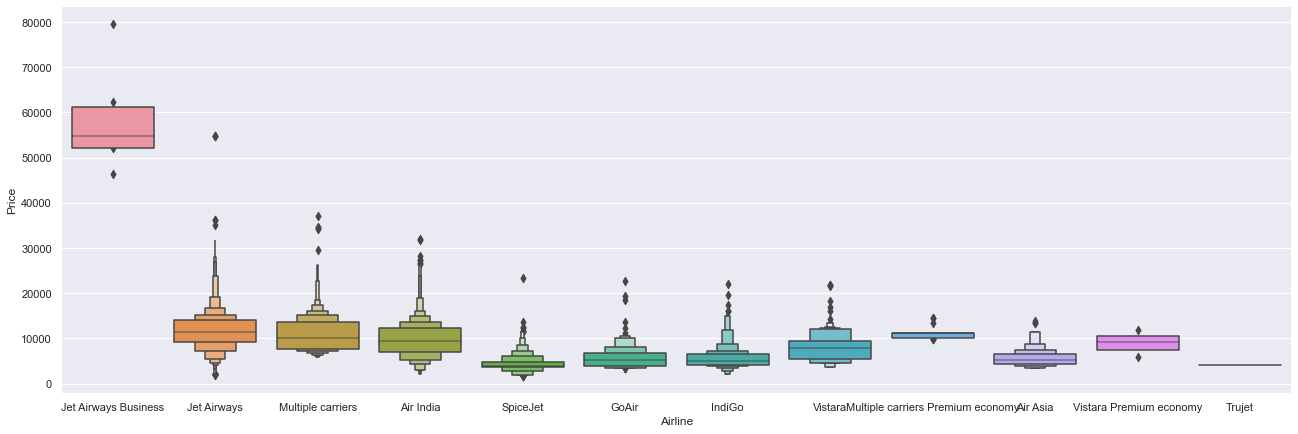

In [45]:
# En el gráfico podemos ver que la aerolínea 'Jet Airways Business' tiene el precio más alto.
# Además de 'Jet Airways Business', todas las aerolíneas manejan precios inferiores a 40000. Algunas de ellas poseen
# mayor presencia de outliers que otras, como es el caso de 'Jet Airways' y 'Multiple Carriers'

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [31]:
# Dado que 'Airline' es una variable Nominal Categórica, vamos a emplear 'OneHotEncoding'

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)  #get_dummies es una técnica de oneHotEncoding, equivalente a aplicar la función OneHotEncoder de sklearn.

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [46]:
train_data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

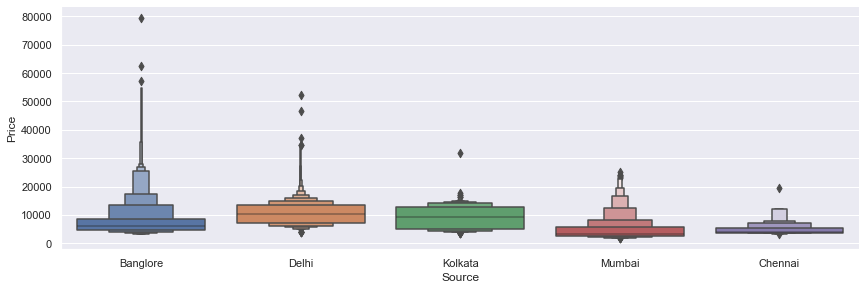

In [47]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

# Hay más outliers en Banglore y Delhi
# Se podría usar boxplot en lugar de catplot   59:38

In [35]:
# Dado que 'Source' corresponden a datos categóricos nominales, usaremos OneHotEncoding
# 'get_dummies' es una técnica de oneHotEncoding, equivalente a aplicar la función OneHotEncoder de sklearn.

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

# Como hicimos drop_first, Bangalore no está presente, pues está representado por las otras 4 variables, es parte del
# oneHotEncoding o de crear variables dummy. Es por esto que la primera fila es toda de ceros, pues representa Bangalore.

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [36]:
train_data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [37]:
# Dado que 'Destination' es categórica nominal, usaremos OneHotEncoding.

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [38]:
train_data["Route"]
# No requeriremos esta variable 'Rouote' ya que está relacionada altamente con "Total Stops", así que la 
# eliminaremos con el método drop posteriormente, al igual que "Additional_Info"  1:03:20.
# No eliminar variables altamente correlacionadas puede causar problemas de multicolinealidad.

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [39]:
# 'Additional_Info' contiene casi 80% de no_info
# Route y Total_Stops están relacionadas entre sí

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [40]:
train_data["Total_Stops"].value_counts()

# No es correcto decir a simple vista que mayor número de "Total_Stops" menor el precio del pasaje, porque no se cumple si
# observamos los datos. El precio depende de otras variables como 'source' y 'destination', 'frecuencia'.
# 'Total stops' Es una variable categórica ordinal (si importa el orden)

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [41]:
# Dado que se trata de una variable categórica ordinal, emplearemos 'LabelEncoder'
# En este caso, los valores se asignan con las claves correpondientes. Se crea un diccionario de clave-valor.

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [42]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [43]:
# Para concatenar el dataframe --> train_data + Airline + Source + Destination
# Axis = 1 --> concatene por filas

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [44]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [45]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [46]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [47]:
data_train.shape   #Finalmente, tenemos 10682 filas y 30 columnas (antes de las transformaciones habían 10683 y 11 variables)

(10682, 30)

---

## Test set

In [48]:
test_data = pd.read_excel(r"C:\1.VIVIANA\3_DATA_SCIENCE\Proyectos_mlearning\Flight_Fare\Data_Train.xlsx")
# Recordemos que la variable dependiente 'Precio' no está en el set de test.

In [46]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [50]:
test_data.shape

(10683, 11)

In [51]:
# Preprocesando el test set, para lo cual emplearemos los mismos procedimientos que con data_train.

print("Test data Info")
print("-"*75)  #imprime 75 veces el guión.
print(test_data.info())

print()   # Imprime espacios en blanco.
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# Análisis Exploratorio de Datos AED o EDA en inglés

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Verificar si 'Duration' contiene únicamente horas y minutos.
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Añade 0 minutos
        else:
            duration[i] = "0h " + duration[i]           # Añade 0 horas

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extrae las horas de la duración
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extrae solo los minutos de la duración

# Añadiendo la columna 'Duration' al test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Variables categóricas 

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contiene casi 80% de no_info
# Route y Total_Stops están relacioandas entre sí.
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Reemplazando Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenar el DataFrame --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)



Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
De

In [52]:
data_test.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


---

## Selección de variables o features

Es necesario descubrir las variables que contribuirán mejor al modelo, siendo estas las que mejor puedan explicar la variable objetivo o dependiente (es decir que tengan una mejor relación con la variable dependiente u objetivo).
A continuación se muestran algunos de los métodos de selección de funciones:


1. <span style="color: purple;">**heatmap**</span>
2. <span style="color: purple;">**feature_importance_**</span>
3. <span style="color: purple;">**SelectKBest**</span>

In [53]:
data_train.shape

(10682, 30)

In [54]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [55]:
#Acá están todas mis variables independientes pero no mi variable objetivo o dependiente.   1:19:40
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [56]:
#Acá llamamos a la variable objetivo
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

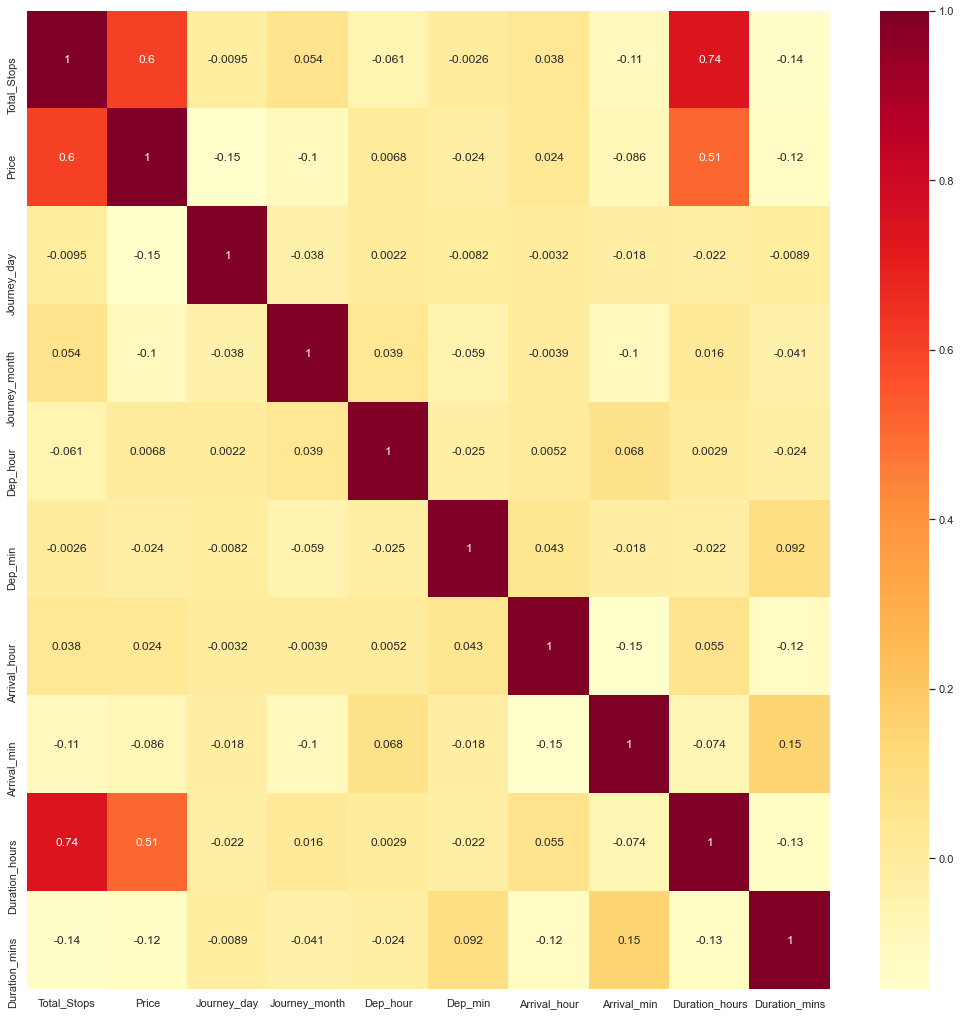

In [57]:
# Encontraremos la correlación entre las variables.
plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlOrRd")  #YlOrRd	yellow, orange, red. Ver más  cmap --> color map
                                                         
plt.show()

# 'annot' de annotate annotbool. Si es True, sirve para escribir los datos en cada celda de la gráfica. 
# El DataFrames hará unn match en posición, no en index. Consultar más en la documentación #https://www.kite.com/python/docs/matplotlib.pyplot.colormaps
# arriba es correlación positiva, abajo es correlación negativa

In [58]:
# Observamos la/s features más importantes usando ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [59]:
print(selection.feature_importances_)

[2.40636489e-01 1.43105637e-01 5.40663276e-02 2.45559380e-02
 2.12173447e-02 2.75446893e-02 1.90904564e-02 1.14932575e-01
 1.78147198e-02 9.99524513e-03 1.93523968e-03 1.76986869e-02
 1.36969716e-01 6.71525719e-02 1.88347942e-02 9.21870892e-04
 3.32233788e-03 1.24003838e-04 5.00981926e-03 7.95011305e-05
 6.05089134e-04 9.46202685e-03 3.16623338e-03 6.73294001e-03
 9.07861674e-03 1.44596663e-02 6.18760086e-03 5.62437271e-04
 2.47374260e-02]


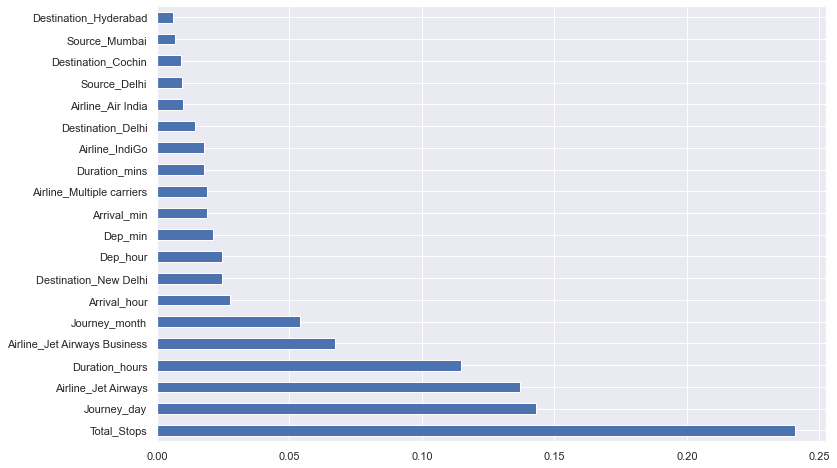

In [68]:
# plot el gráfico de importancia de variables para mejor visualización.

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Total_Stops es la más importante según la gráfica, es decir la que mejor podría explicar a la variable dependiente.

---

## Modelo de ajuste usando Random Forest

1. Dividimos el dataset en sets de train y test para la predicción. w.r.t X_test
2. Si es necesario, escalamos los datos
    * El escalado no se realiza en el bosque aleatorio
3. Importar el modelo
4. Ajustar los datos
5. Predecir w.r.t X_test
6. En modelos de Regresión, verificar el **RSME** Score (Root Mean Square Error o Error Cuadrático Medio)
7. Trazar la gráfica

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [71]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [73]:
y_pred = reg_rf.predict(X_test)

In [75]:
reg_rf.score(X_train, y_train)

0.9538887074140766

In [76]:
reg_rf.score(X_test, y_test)

0.7968643433316065

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


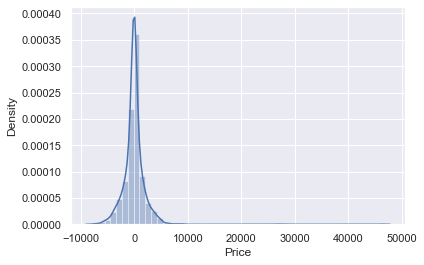

In [77]:
sns.distplot(y_test-y_pred)
plt.show()

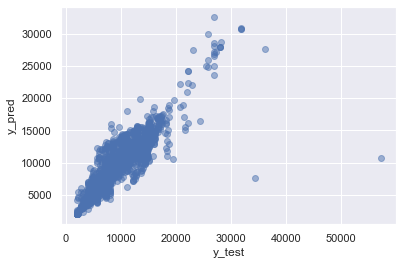

In [78]:

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [79]:
from sklearn import metrics

In [80]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1173.7986715571383
MSE: 4380022.470529491
RMSE: 2092.8503220559014


In [81]:
# RMSE/(max(DV)-min(DV))C:\1.VIVIANA\3_DATA_SCIENCE\Proyectos_mlearning\Flight_Fare

2090.5509/(max(y)-min(y))

0.026887077025966846

In [82]:
metrics.r2_score(y_test, y_pred)

0.7968643433316065

---

## Ajuste de hiperparámetros


* Elegir el siguiente método para el ajuste de hiperparámetros
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Asignar hiperparámetros en forma de diccionario
* Se ajusta al modelo
* Verificar los mejores parámetros y la mejor puntuación

In [84]:
from sklearn.model_selection import RandomizedSearchCV  #1:27:22

In [85]:
#Randomized Search CV

# Número de árboles en el 'random forest'
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Número de features para considerar en cada split
max_features = ['auto', 'sqrt']
# Número de niveles máximo en el árbol
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Mínimo número de muestras requeridas para dividir un nodo
min_samples_split = [2, 5, 10, 15, 100]
# Número mínimo de muestras necesarias en cada nodo hoja
min_samples_leaf = [1, 2, 5, 10]

In [89]:
# Creamos la cuadrícula aleatoria o random grid   #acá creamos un diccionario

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [90]:
# Búsqueda aleatoria de parámetros, utilizando 5 folds para la validación cruzada
# Buscar en 100 combinaciones diferentes

rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

# n_iter es número de iteraciones
# n_jobs = 1 implica trabajar con un solo core,  n_jobs = -1 : usa todos los cores disponibles para trabajar en paralelo, etc.
# https://machinelearningmastery.com/multi-core-machine-learning-in-python/

In [91]:
rf_random.fit(X_train,y_train) #Este proceso puede tardar unos minutos. Podemos prepararnos un café y seguir con nuestro modelo.

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   8.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  12.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.4s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 10.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [67]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [92]:
prediction = rf_random.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


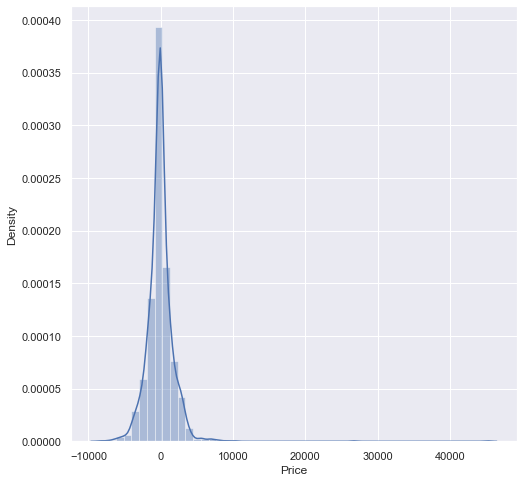

In [93]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

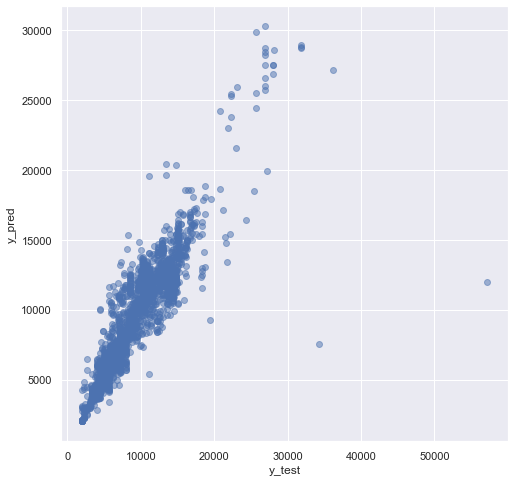

In [71]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [94]:
#Es importante dar una correcta interpretación a estas métricas.
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1165.398845308717
MSE: 4058280.7461630376
RMSE: 2014.5174971101735


---

## Guardamos el modelo para usarlo de nuevo

In [101]:
import pickle
# abre un archivo, donde quieras almacenar los datos
file = open('flight_rf.pkl', 'wb')

# volcar información en ese archivo
pickle.dump(rf_random, file)

In [102]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [103]:
y_prediction = forest.predict(X_test)

In [104]:
metrics.r2_score(y_test, y_prediction)
#arroja la métrica de medición R2

0.8117860056967084

# Créditos

### Dataset tomado de Nikhil Mittal
https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh
    
### Notebook tomado de:
### * Ayush Pandey, y 
https://www.kaggle.com/ayushpandey1/flight-fare-prediction <br>

### * Amar Mandal:
https://www.linkedin.com/posts/amar-mandal_python-machinelearning-ai-activity-6684710743859888128-6ktE/
    
### Análisis del notebook y tutorial de Sir Krish Naik:
https://www.youtube.com/watch?v=y4EMEpEnElQ

# Bibliografía

Pandas (03 de septiembre de 2021). DataFrame. Extraído de https://pandas.pydata.org/docs/reference/frame.html

Brownlee, Jason (04 de septiembre de 2021). Multi-Core Machine Learning in Python With Scikit-Learn. Extraído de https://machinelearningmastery.com/multi-core-machine-learning-in-python/

Scikit-learn (04 de septiembre de 2021). Machine learning in Python. Extraído de https://scikit-learn.org/stable/

### Traducción y apuntes añadidos al Notebook original por: 
#### Viviana Márquez Ramírez
* Likendin:
https://www.linkedin.com/in/vivianamarquezr/
* E-mail:
anabelmr20@gmail.com
* País:
Ecuador